In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy,pandas & visualization packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data
help = pd.read_csv("C:/Users/Aditya/Documents/Assignment/Clustering/Country-data.csv")

In [4]:
#To know no.of rows & columns in a dataframe
help.shape

(167, 10)

In [5]:
#Verifying head of dataframe
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#Finding how many unique countries are present in dataset. 
unique = help['country'].unique()
len(unique)

#It is observed there are 167 unique countries which means there are no duplicates

167

In [7]:
#Checking info on dataset
help.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### Checking for Missing Values

In [8]:
# Checking the percentage of missing values
round(100*(help.isnull().sum()/len(help.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [9]:
#Verify statistical details of dataframe
help.describe()

#From the below statistical details it can be observed that there are outliers in the data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Checking for outliers by using box plots

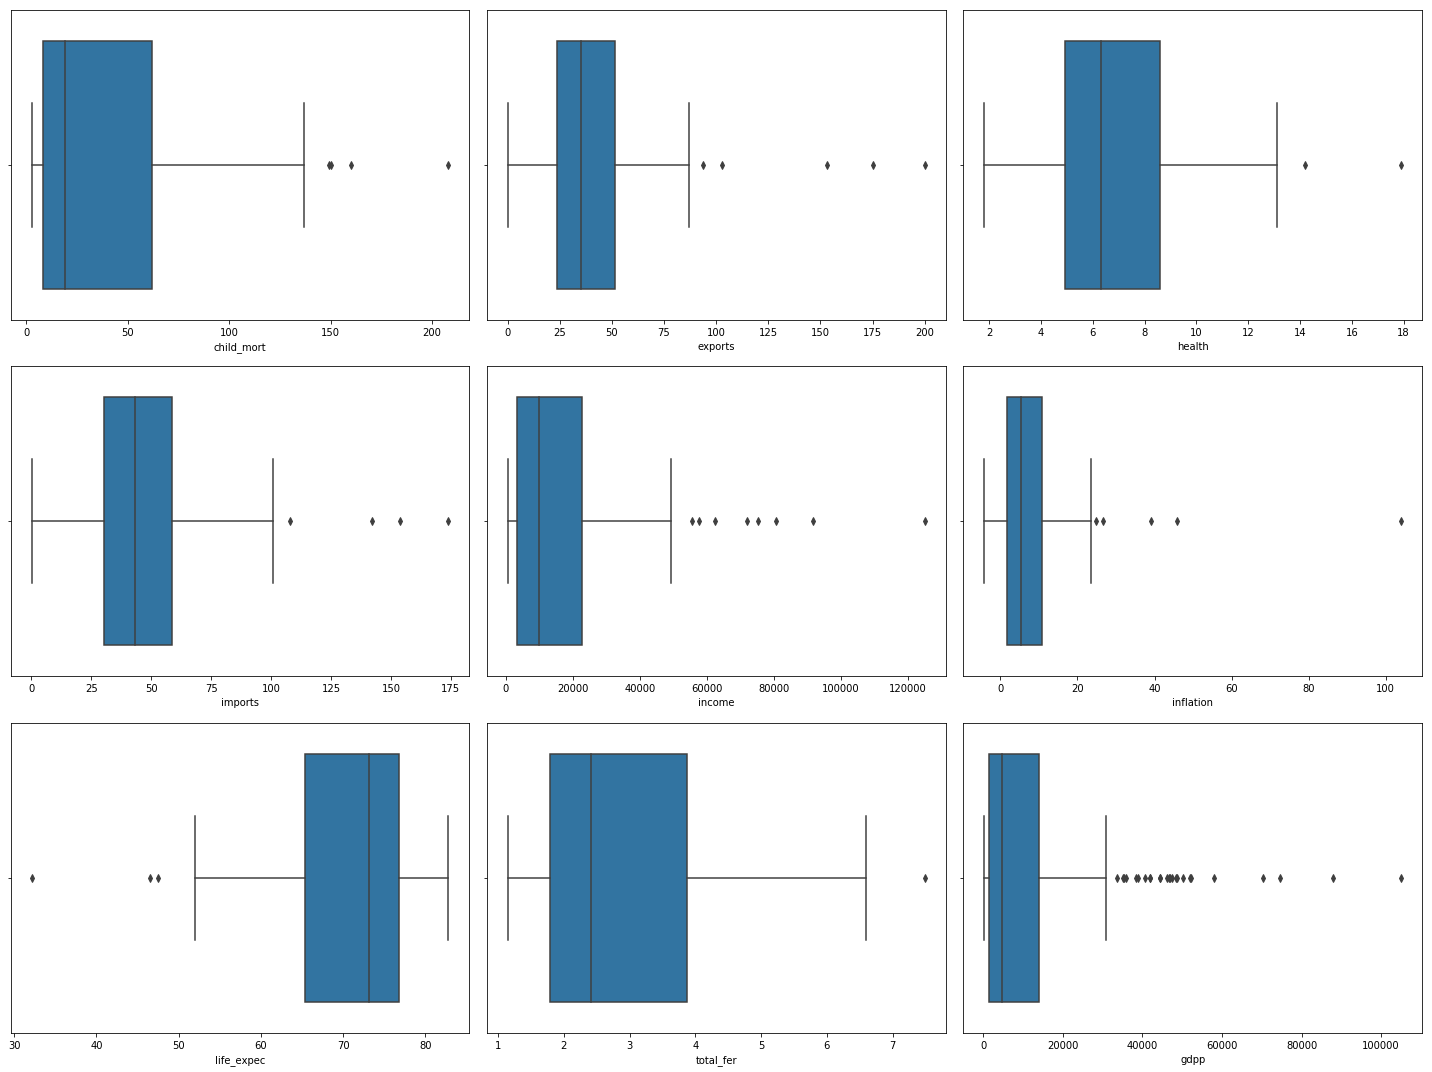

In [10]:
fig, axs = plt.subplots(3,3,figsize = (20,15))
plt1 = sns.boxplot(help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(help['exports'], ax = axs[0,1])
plt3 = sns.boxplot(help['health'], ax = axs[0,2])
plt4 = sns.boxplot(help['imports'], ax = axs[1,0])
plt5 = sns.boxplot(help['income'], ax = axs[1,1])
plt6 = sns.boxplot(help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(help['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(help['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(help['gdpp'], ax = axs[2,2])

plt.tight_layout()

##### From above box plot it seems that there are outliers. But these are values for each country. For eg: few under developed countries will have low life_expectency, low gdpp, low income, low imports & exports, high inflation,high child_mortality, high total_fer and developed countries will have values vice versa for same facctors. So considering this each data provides useful insights. So it is not required to handle outliers in this case

#### Let's visualize and find the 5 underdeveloped countries which are in need of the aid at most based on the following factors low life_expectency, low gdpp, low income, low imports & exports, high inflation,high child_mortality, high total_fer

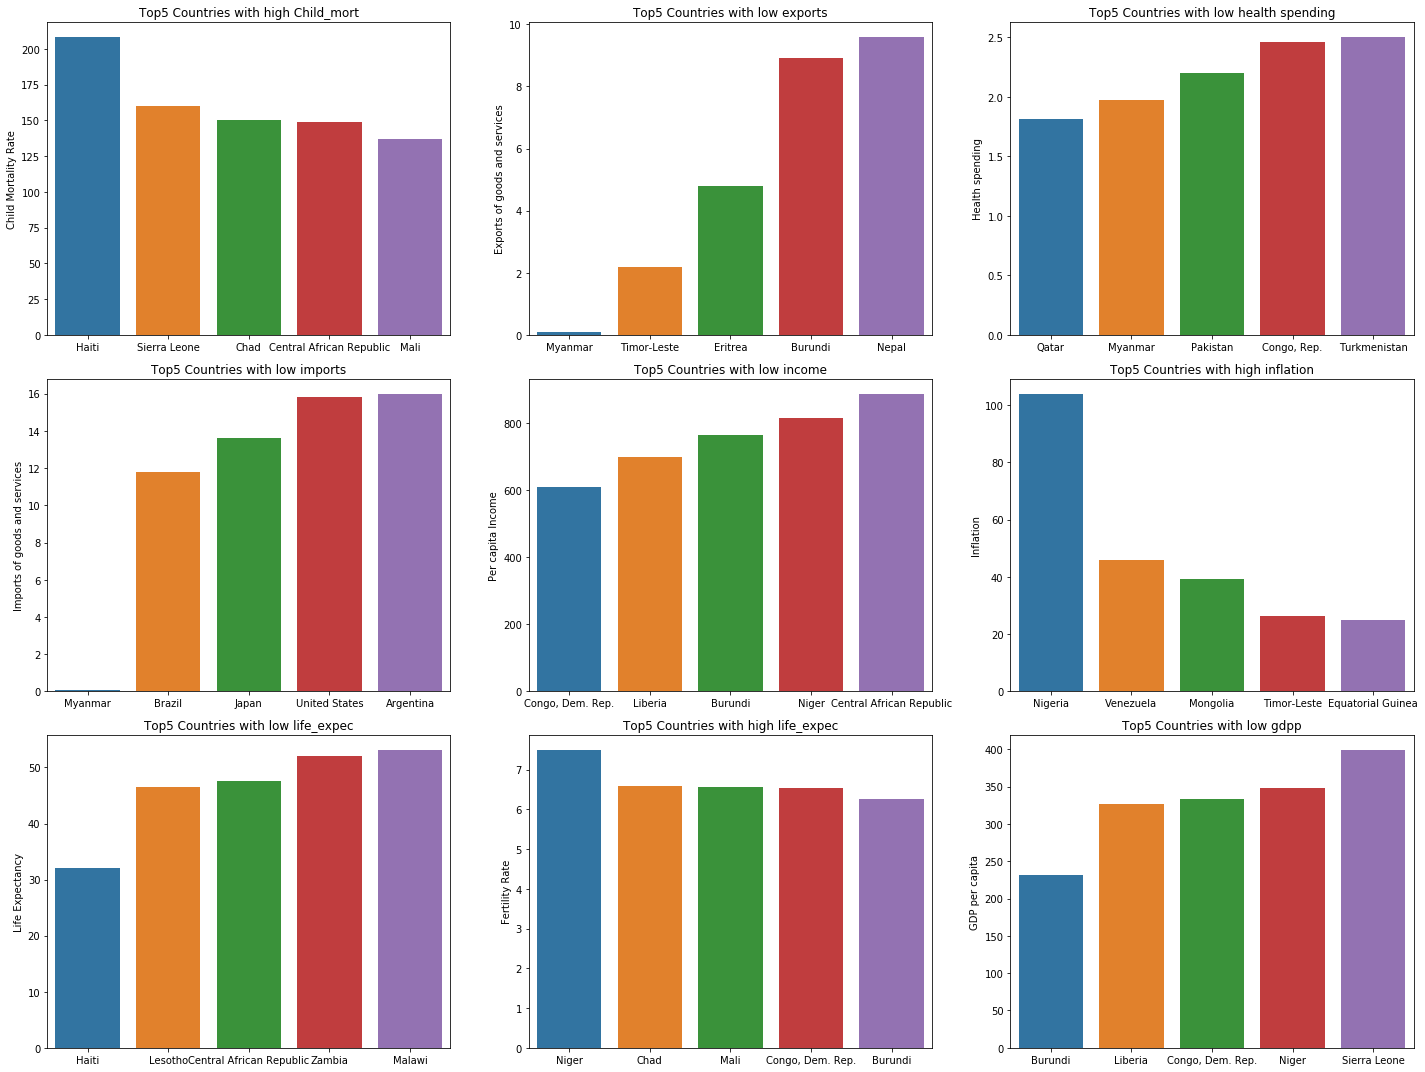

In [11]:
fig, axs = plt.subplots(3,3,figsize = (20,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

child_mort_top5 = help[['country','child_mort']].sort_values('child_mort', ascending = False).head(5)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mort_top5, ax = axs[0,0])
plt1.set(title = 'Top5 Countries with high Child_mort', xlabel = '', ylabel= 'Child Mortality Rate')

# Exports: Exports of goods and services. Given as %age of the Total GDP

exports_bottom5 = help[['country','exports']].sort_values('exports', ascending = True).head(5)
plt2 = sns.barplot(x='country', y='exports', data= exports_bottom5, ax = axs[0,1])
plt2.set(title = 'Top5 Countries with low exports', xlabel = '', ylabel= 'Exports of goods and services')

# Health :Total health spending as %age of Total GDP.

health_bottom5 = help[['country','health']].sort_values('health', ascending = True).head(5)
plt3 = sns.barplot(x='country', y='health', data= health_bottom5, ax = axs[0,2])
plt3.set(title = 'Top5 Countries with low health spending', xlabel = '', ylabel= 'Health spending')

# Imports: Imports of goods and services. Given as %age of the Total GDP

imports_bottom5 = help[['country','imports']].sort_values('imports', ascending = True).head(5)
plt4 = sns.barplot(x='country', y='imports', data= imports_bottom5, ax = axs[1,0])
plt4.set(title = 'Top5 Countries with low imports', xlabel = '', ylabel= 'Imports of goods and services')

# Per capita Income : Net income per person

income_bottom5 = help[['country','income']].sort_values('income', ascending = True).head(5)
plt5 = sns.barplot(x='country', y='income', data= income_bottom5, ax = axs[1,1])
plt5.set(title = 'Top5 Countries with low income', xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

inflation_top5 = help[['country','inflation']].sort_values('inflation', ascending = False).head(5)
plt6 = sns.barplot(x='country', y='inflation', data= inflation_top5, ax = axs[1,2])
plt6.set(title = 'Top5 Countries with high inflation', xlabel = '', ylabel= 'Inflation')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

life_expec_bottom5 = help[['country','life_expec']].sort_values('life_expec', ascending = True).head(5)
plt7 = sns.barplot(x='country', y='life_expec', data= life_expec_bottom5, ax = axs[2,0])
plt7.set(title = 'Top5 Countries with low life_expec', xlabel = '', ylabel= 'Life Expectancy')


# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
total_fer_top5 = help[['country','total_fer']].sort_values('total_fer', ascending = False).head(5)
plt8 = sns.barplot(x='country', y='total_fer', data= total_fer_top5, ax = axs[2,1])
plt8.set(title = 'Top5 Countries with high life_expec', xlabel = '', ylabel= 'Fertility Rate')


# The GDP per capita : Calculated as the Total GDP divided by the total population.

gdpp_bottom5 = help[['country','gdpp']].sort_values('gdpp', ascending = True).head(5)
plt9 = sns.barplot(x='country', y='gdpp', data= gdpp_bottom5, ax = axs[2,2])
plt9.set(title = 'Top5 Countries with low gdpp', xlabel = '', ylabel= 'GDP per capita')

plt.tight_layout()
plt.show()

### Feature Standardisation

In [12]:
# Normalising continuous features
df = help[['child_mort','health','exports','imports','income','inflation','life_expec','total_fer','gdpp']]

In [13]:
#Apply stadard scaling using below formala. We can also use sklearn.preprocessing library for scaling
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,child_mort,health,exports,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,0.278251,-1.134867,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.096725,-0.478220,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.963176,-0.098824,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-1.443729,0.773056,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.286034,0.160186,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [14]:
#Dropping the original variables and including the stanndardised variables in data set.
help1 = help.drop(['child_mort','health','exports','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
normalized_df_country = pd.concat([help1,normalized_df],axis=1)
normalized_df_country.head()

,country,child_mort,health,exports,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,0.278251,-1.134867,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.096725,-0.478220,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.963176,-0.098824,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-1.443729,0.773056,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.286034,0.160186,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


#### PCA on the above data

In [15]:
#Assigning feature and target variables to x & y
x= normalized_df
y = help.drop(['child_mort','health','exports','imports','income','inflation','life_expec','total_fer','gdpp'], 1)

In [16]:
#Verifying the shape
normalized_df.shape

(167, 9)

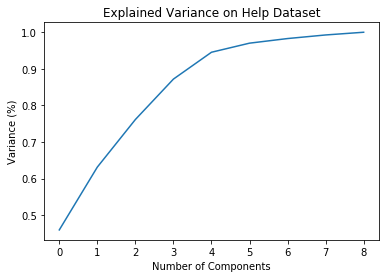

In [17]:
#Importing the PCA module
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(x)

#Scree plot - Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance on Help Dataset')
plt.show()

##### The above plot tells us that selecting 5 components we can preserve around 95% of the total variance of the data. With this information in our hands, we can implement the PCA for 5 best components we will also verify this by variance explanation plot below

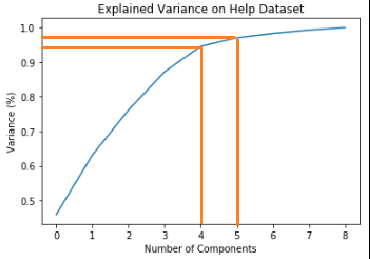

In [18]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)


In [19]:
help_pca = pca_final.fit_transform(x)
pca_final.explained_variance_ratio_

array([0.45950112, 0.1717258 , 0.1295817 , 0.11045942, 0.07191446])

In [20]:
pca_final.components_

array([[-0.41967749,  0.15090765,  0.28371974,  0.16157087,  0.39861811,
        -0.1928264 ,  0.42549267, -0.40396116,  0.39266855],
       [ 0.19312245, -0.24350339,  0.61357956,  0.67130924,  0.02407378,
        -0.00332551, -0.22455856,  0.15219983, -0.04573737],
       [-0.03436069, -0.6044529 ,  0.14687014, -0.30913862,  0.30002773,
         0.62984364,  0.12047131,  0.02795883,  0.11959861],
       [ 0.37107257,  0.45432934,  0.00490633, -0.07721714,  0.39426589,
         0.14920805, -0.19996777,  0.38322405,  0.53417883],
       [-0.18390053,  0.51574709,  0.07043899,  0.24222051, -0.25069755,
         0.71769058,  0.13980886, -0.08575814, -0.17810981]])

In [21]:
#Verifying variance explanation for all principal components
dim = ['PC {}'.format(i) for i in range(1,len(pca_final.components_)+1)]

components = pd.DataFrame(pca_final.components_,columns=x.columns)
components.index = dim

variance = pd.DataFrame(pca_final.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dim

pd.concat([variance,components], axis=1)

,Explained Variance,child_mort,health,exports,imports,income,inflation,life_expec,total_fer,gdpp
PC 1,0.459501,-0.419677,0.150908,0.283720,0.161571,0.398618,-0.192826,0.425493,-0.403961,0.392669
PC 2,0.171726,0.193122,-0.243503,0.613580,0.671309,0.024074,-0.003326,-0.224559,0.152200,-0.045737
PC 3,0.129582,-0.034361,-0.604453,0.146870,-0.309139,0.300028,0.629844,0.120471,0.027959,0.119599
PC 4,0.110459,0.371073,0.454329,0.004906,-0.077217,0.394266,0.149208,-0.199968,0.383224,0.534179
PC 5,0.071914,-0.183901,0.515747,0.070439,0.242221,-0.250698,0.717691,0.139809,-0.085758,-0.178110


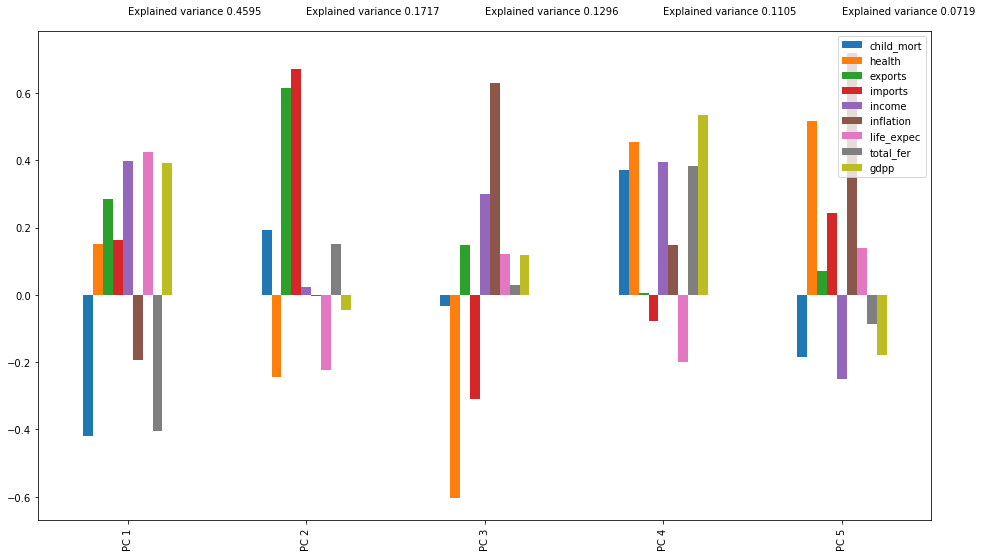

In [22]:
#Plotting variance explanation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))
components.plot(kind='bar', ax=ax)
ax.set_xticklabels(dim)
for i,variance in enumerate(pca_final.explained_variance_ratio_):
    ax.text(i,ax.get_ylim()[1]+0.05,'Explained variance {}'.format(np.round(variance,4)))
plt.show()

#### First 4 principal components explain the variance of 0.87(0.45+0.17+0.13+0.11) so we can say its good to use  first 4 principal components.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

In [24]:
#Converting PCA array to a dataframe
help_pca = pca.transform(x)
help_pca = pd.DataFrame(help_pca,columns=['PC1','PC2', 'PC3','PC4'])
help_pca.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [25]:
#Copying the above data frame to help_pca_h to use it for hierarchical clustering
help_pca_h = help_pca
help_pca_h.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


#### Creating correlation matrix for the principal components -To check correlation. No correlation expected

In [26]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(help_pca.transpose())

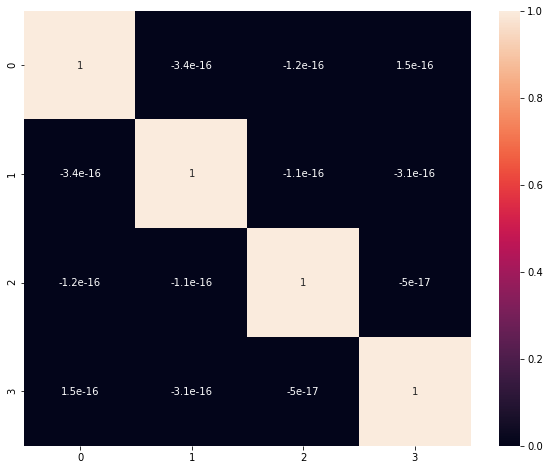

In [27]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(corrmat,annot = True)

#### From above correlation plot it can be observed that correlations are very close to 0. Hence there is no correlation between any two components which tells that PCA technique has been applied well to the data

In [28]:
#Adding feature column to PC dataframe
colnames = list(x.columns)

help_pca_feature = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],
                         'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':colnames})
help_pca_feature.head()

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.150838,-0.243087,-0.596632,0.461897,health
2,0.283897,0.613163,0.144761,0.003091,exports
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income


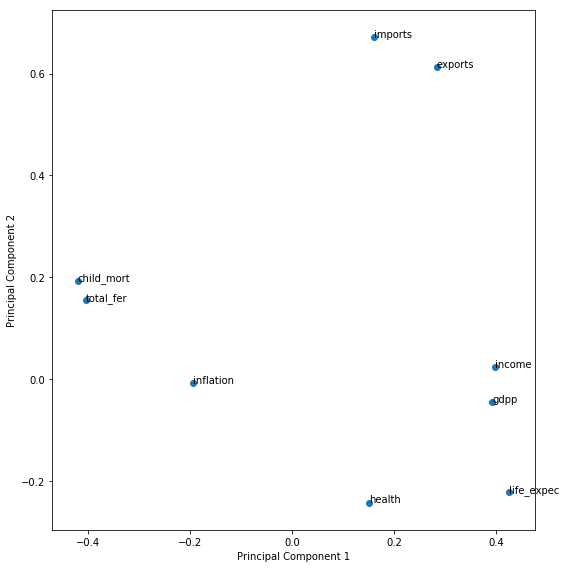

In [29]:
#Plotting principal components
fig = plt.figure(figsize = (8,8))
plt.scatter(help_pca_feature.PC1, help_pca_feature.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(help_pca_feature.Feature):
    plt.annotate(txt, (help_pca_feature.PC1[i],help_pca_feature.PC2[i]))
plt.tight_layout()
plt.show()

#### From above plot it can be observed below
#### 1. First component is in the direction where the 'health', 'life_exp', 'gdpp', 'income' variables are heavy
#### 2. Both components are in the direction where the 'import' & 'export' variables are heavy
#### 3. Second component  in the direction where the 'child_mort' & 'total_fert' variables are heavy

### Clustering analysis

#### Find Hopkins Statistics: The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

    If the value is between {0.01, ...,0.3}, the data is regularly spaced.

    If the value is around 0.5, it is random.

    If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(x)

# Hence it can be observed that data has a high tendency to cluster.

0.8535967722248448

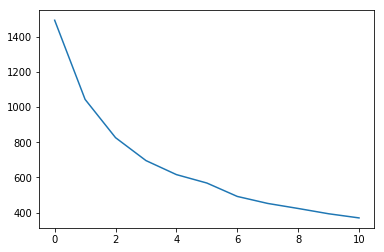

In [32]:
# Let's use elbow method to find optimal number of cluters
# sum of squared distances or WCSS(Within-Cluster-Sum-of-Squares)
from sklearn.cluster import KMeans
ssd = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

### Notice how the elbow chart above does not have a clear elbow. Instead, we see a fairly smooth curve, and it's unclear what is the best value of k to choose. In cases like this, we might try a different method for determining the optimal k, such as computing silhouette scores

### To explore we can choose K between 3 to 5 as there is a minor elbow at 3 and after 5 curve is smooth

## Silhouette Score

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [33]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x)
    sse_.append([k, silhouette_score(x, kmeans.labels_)])

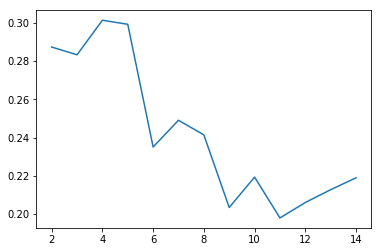

In [34]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

##### Notice from above plot we can consider 5 as optimal nummber for k.

### Fitting K means on the data set 

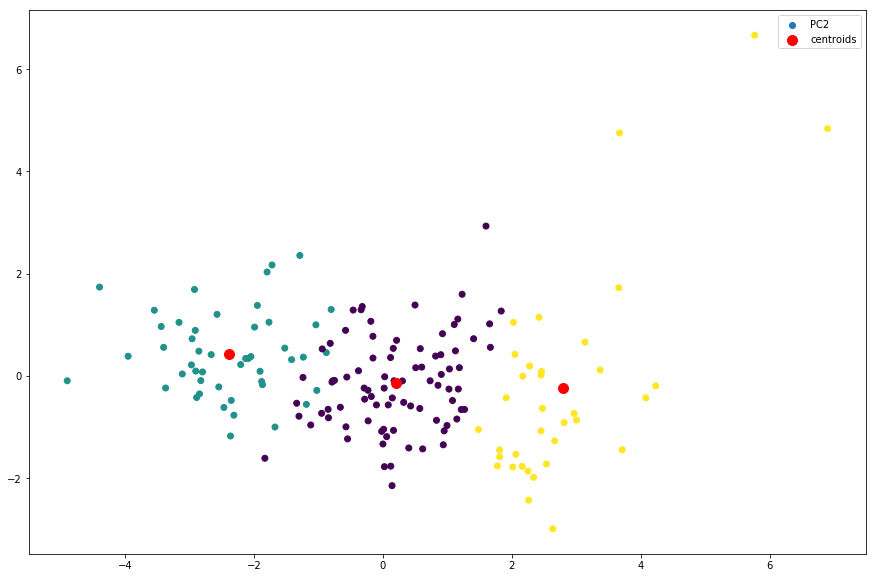

In [35]:
# Iteration-1 with k=3
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42, max_iter=1000)
kmeans3.fit(help_pca)
kmeans3.predict(help_pca)


#Visualize clusters
plt.figure(figsize=(15, 10))
plt.scatter(help_pca.iloc[:,0], help_pca.iloc[:,1], c=kmeans3.labels_.astype(float))
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],s=100, c='red', label ='centroids')
plt.legend()

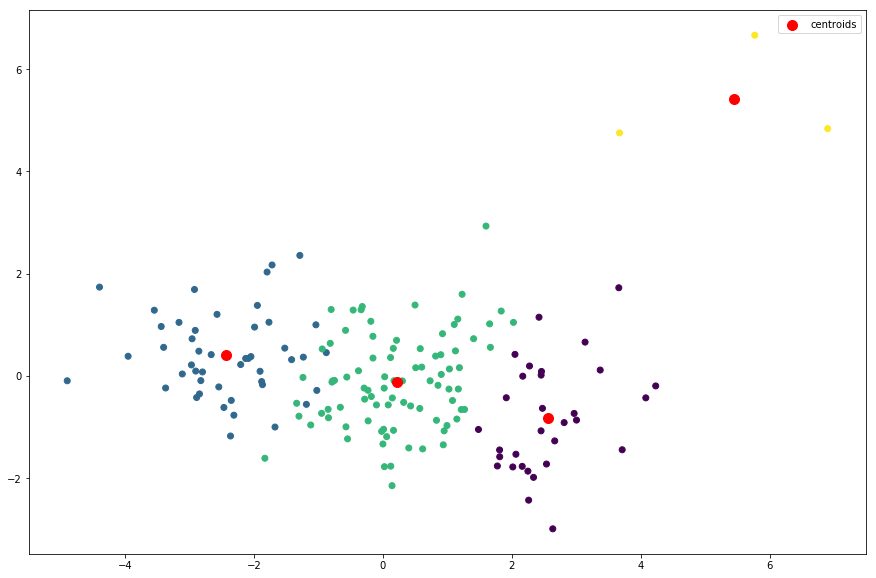

In [36]:
# Iteration-2 with k=4
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', random_state=42, max_iter=1000)
kmeans4.fit(help_pca)
kmeans4.predict(help_pca)


#Visualize clusters
plt.figure(figsize=(15, 10))
plt.scatter(help_pca.values[:,0], help_pca.values[:,1], c=kmeans4.labels_.astype(float))
plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],s=100, c='red', label ='centroids')
plt.legend()

In [37]:
print(kmeans4.cluster_centers_)

[[ 2.56102103 -0.82260669  0.05495355  0.93477554]
 [-2.42731973  0.41004245 -0.0958783   0.68963594]
 [ 0.21349789 -0.1165086   0.02522884 -0.74535992]
 [ 5.44385209  5.41618403  0.21101332  0.90334079]]


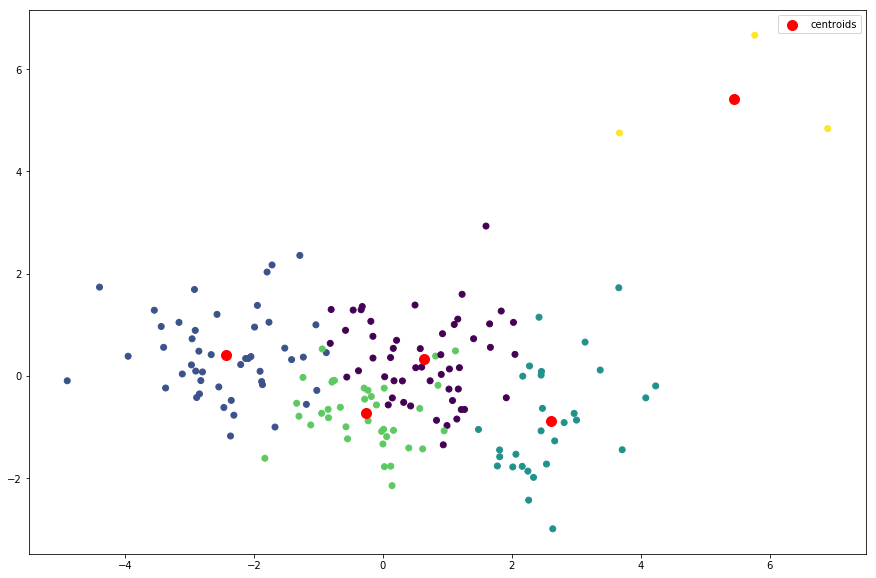

In [38]:
# Iteration-3 with k=5
kmeans5 = KMeans(n_clusters = 5, init = 'k-means++', random_state=42, max_iter=1000)
kmeans5.fit(help_pca)
kmeans5.predict(help_pca)


#Visualize clusters
plt.figure(figsize=(15, 10))
plt.scatter(help_pca.values[:,0], help_pca.values[:,1], c=kmeans5.labels_.astype(float))
plt.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1],s=100, c='red', label ='centroids')
plt.legend()

In [39]:
print(kmeans5.cluster_centers_)

[[ 0.63405379  0.33322618 -0.43873216 -0.76073238]
 [-2.42731973  0.41004245 -0.0958783   0.68963594]
 [ 2.60111153 -0.87919139  0.07258437  1.0296338 ]
 [-0.2707164  -0.7302306   0.65253064 -0.70770108]
 [ 5.44385209  5.41618403  0.21101332  0.90334079]]


In [40]:
help_pca.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [41]:
#Adding 'cluster ID' column to PCA dataframe
help_pca_clusterID = help_pca
help_pca_clusterID['cluster ID'] = kmeans5.labels_
help_pca_clusterID.head()

,PC1,PC2,PC3,PC4,cluster ID
0,-2.904290,0.095334,-0.715965,1.002240,1
1,0.428622,-0.586392,-0.332486,-1.157577,0
2,-0.284370,-0.453810,1.217842,-0.865511,3
3,-2.923630,1.690471,1.520471,0.837107,1
4,1.030477,0.136249,-0.225044,-0.844523,0


In [42]:
#Adding 'country' column to help_pca_clusterID dataframe
help_pca_cluster = pd.concat([y, help_pca_clusterID], axis=1, join='outer', join_axes=None, ignore_index=False)
help_pca_cluster.head()

,country,PC1,PC2,PC3,PC4,cluster ID
0,Afghanistan,-2.904290,0.095334,-0.715965,1.002240,1
1,Albania,0.428622,-0.586392,-0.332486,-1.157577,0
2,Algeria,-0.284370,-0.453810,1.217842,-0.865511,3
3,Angola,-2.923630,1.690471,1.520471,0.837107,1
4,Antigua and Barbuda,1.030477,0.136249,-0.225044,-0.844523,0


In [43]:
#Removing PC's from help_pca_cluster dataframe and adding original socio-economic data to help_pca_cluster dataframe
help_pca_cluster = help_pca_cluster[['country', 'cluster ID']].merge(help, on = 'country')
help_pca_cluster.head()

,country,cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
#Calculating mean of each variable grouped by 'cluster ID'
help_clusters_child_mort = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).child_mort.mean())
help_clusters_exports = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).exports.mean())
help_clusters_health = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).health.mean())
help_clusters_imports = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).imports.mean())
help_clusters_income = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).income.mean())
help_clusters_inflation = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).inflation.mean())
help_clusters_life_expec = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).life_expec.mean())
help_clusters_total_fer = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).total_fer.mean())
help_clusters_gdpp = pd.DataFrame(help_pca_cluster.groupby(['cluster ID']).gdpp.mean())

In [46]:
#Creating a dataframe from the mean data
help_kmean= pd.concat([pd.Series(list(range(0,5))), help_clusters_child_mort,help_clusters_exports, help_clusters_health, 
                        help_clusters_imports,help_clusters_income, help_clusters_inflation, help_clusters_life_expec,
                        help_clusters_total_fer,help_clusters_gdpp], axis=1)
help_kmean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]


In [47]:
help_kmean

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,17.241176,50.378431,6.937451,60.394118,13308.235294,3.873627,73.198039,2.137451,7723.450980
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241
3,3,26.640541,28.983486,5.287568,30.958538,12971.621622,12.177730,72.767568,2.463514,6220.702703
4,4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


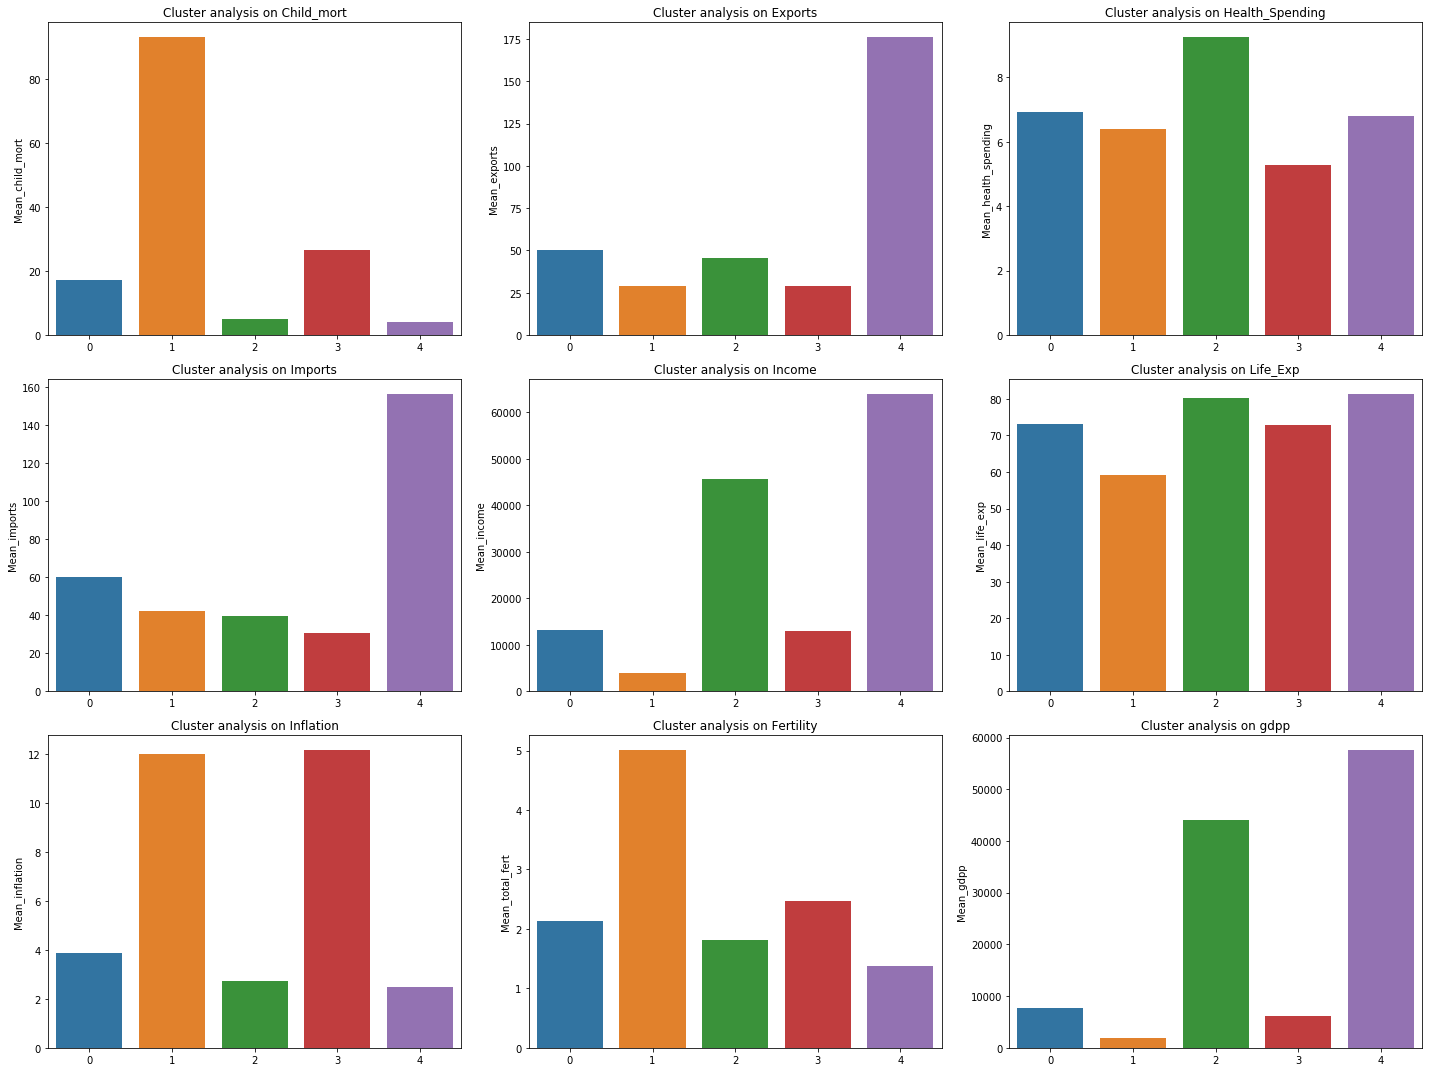

In [48]:
#plotting bar chart 
fig, axs = plt.subplots(3,3,figsize = (20,15))

#Cluster analysis on Child_mort
plt1 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.child_mort_mean, ax = axs[0,0])
plt1.set(title = 'Cluster analysis on Child_mort', xlabel = '', ylabel= 'Mean_child_mort')

#Cluster analysis on Exports
plt2 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.exports_mean, ax = axs[0,1])
plt2.set(title = 'Cluster analysis on Exports', xlabel = '', ylabel= 'Mean_exports')

#Cluster analysis on Health_Spending
plt3 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.health_mean, ax = axs[0,2])
plt3.set(title = 'Cluster analysis on Health_Spending', xlabel = '', ylabel= 'Mean_health_spending')

#Cluster analysis on Imports
plt4 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.imports_mean, ax = axs[1,0])
plt4.set(title = 'Cluster analysis on Imports', xlabel = '', ylabel= 'Mean_imports')

#Cluster analysis on Income
plt5 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.income_mean, ax = axs[1,1])
plt5.set(title = 'Cluster analysis on Income', xlabel = '', ylabel= 'Mean_income')

#Cluster analysis on Life_Exp
plt6 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.life_expec_mean, ax = axs[1,2])
plt6.set(title = 'Cluster analysis on Life_Exp', xlabel = '', ylabel= 'Mean_life_exp')

#Cluster analysis on Inflation
plt7= sns.barplot(x=help_kmean.ClusterID, y=help_kmean.inflation_mean, ax = axs[2,0])
plt7.set(title = 'Cluster analysis on Inflation', xlabel = '', ylabel= 'Mean_inflation')

#Cluster analysis on Fertility
plt8 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.total_fer_mean, ax = axs[2,1])
plt8.set(title = 'Cluster analysis on Fertility', xlabel = '', ylabel= 'Mean_total_fert')

#Cluster analysis on gdpp
plt9 = sns.barplot(x=help_kmean.ClusterID, y=help_kmean.gdpp_mean, ax = axs[2,2])
plt9.set(title = 'Cluster analysis on gdpp', xlabel = '', ylabel= 'Mean_gdpp')

plt.tight_layout()
plt.show()

####  From above plots it is evident that Cluster with ClusterID 1, is the cluster which consists of under developed countries and cluster with  ClusterID 4, is the cluster which consists of developed countries

In [49]:
#From above plot it is evident that custer 1 is the cluster which needs aid at the most. Let's find list of countries
help_pca_cluster[help_pca_cluster['cluster ID'] == 1].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

#### Above is the list of countries which are need of aid at most

#### To find the Top 5 countries within cluster 1 we will consider 'child_mort', 'inflation', & 'total_fer' as factors to select top 5 countries as if the the countries which have high sum of these 3 columns can be considered as top 5.

In [50]:
help_pca_top5 = help_pca_cluster[help_pca_cluster['cluster ID'] == 1]
help_pca_top5['sum'] = help_pca_top5['child_mort'] + help_pca_top5['inflation'] + help_pca_top5['total_fer']

help_pca_top5 = help_pca_top5.sort_values(by='sum', ascending=False)
help_pca_top5.head(10)


,country,cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,sum
113,Nigeria,1,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,239.84
66,Haiti,1,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,216.78
132,Sierra Leone,1,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,182.40
32,Chad,1,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,162.98
31,Central African Republic,1,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,156.22
97,Mali,1,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,147.92
3,Angola,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,147.56
37,"Congo, Dem. Rep.",1,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,143.34
49,Equatorial Guinea,1,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17100,141.11
112,Niger,1,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,133.04


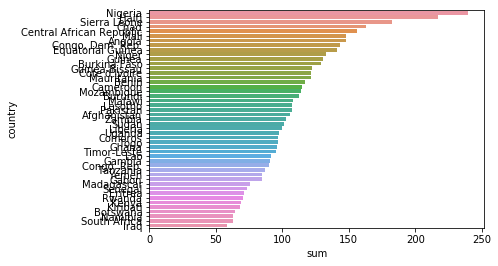

In [51]:
import matplotlib.pyplot as plt
bar = sns.barplot(x="sum", y="country", data=help_pca_top5)
plt.rcParams['figure.figsize']=(40,15)

In [52]:
top5_kmeans = help_pca_top5.iloc[0:5]
top5_kmeans

,country,cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,sum
113,Nigeria,1,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,239.84
66,Haiti,1,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,216.78
132,Sierra Leone,1,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,182.40
32,Chad,1,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,162.98
31,Central African Republic,1,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,156.22


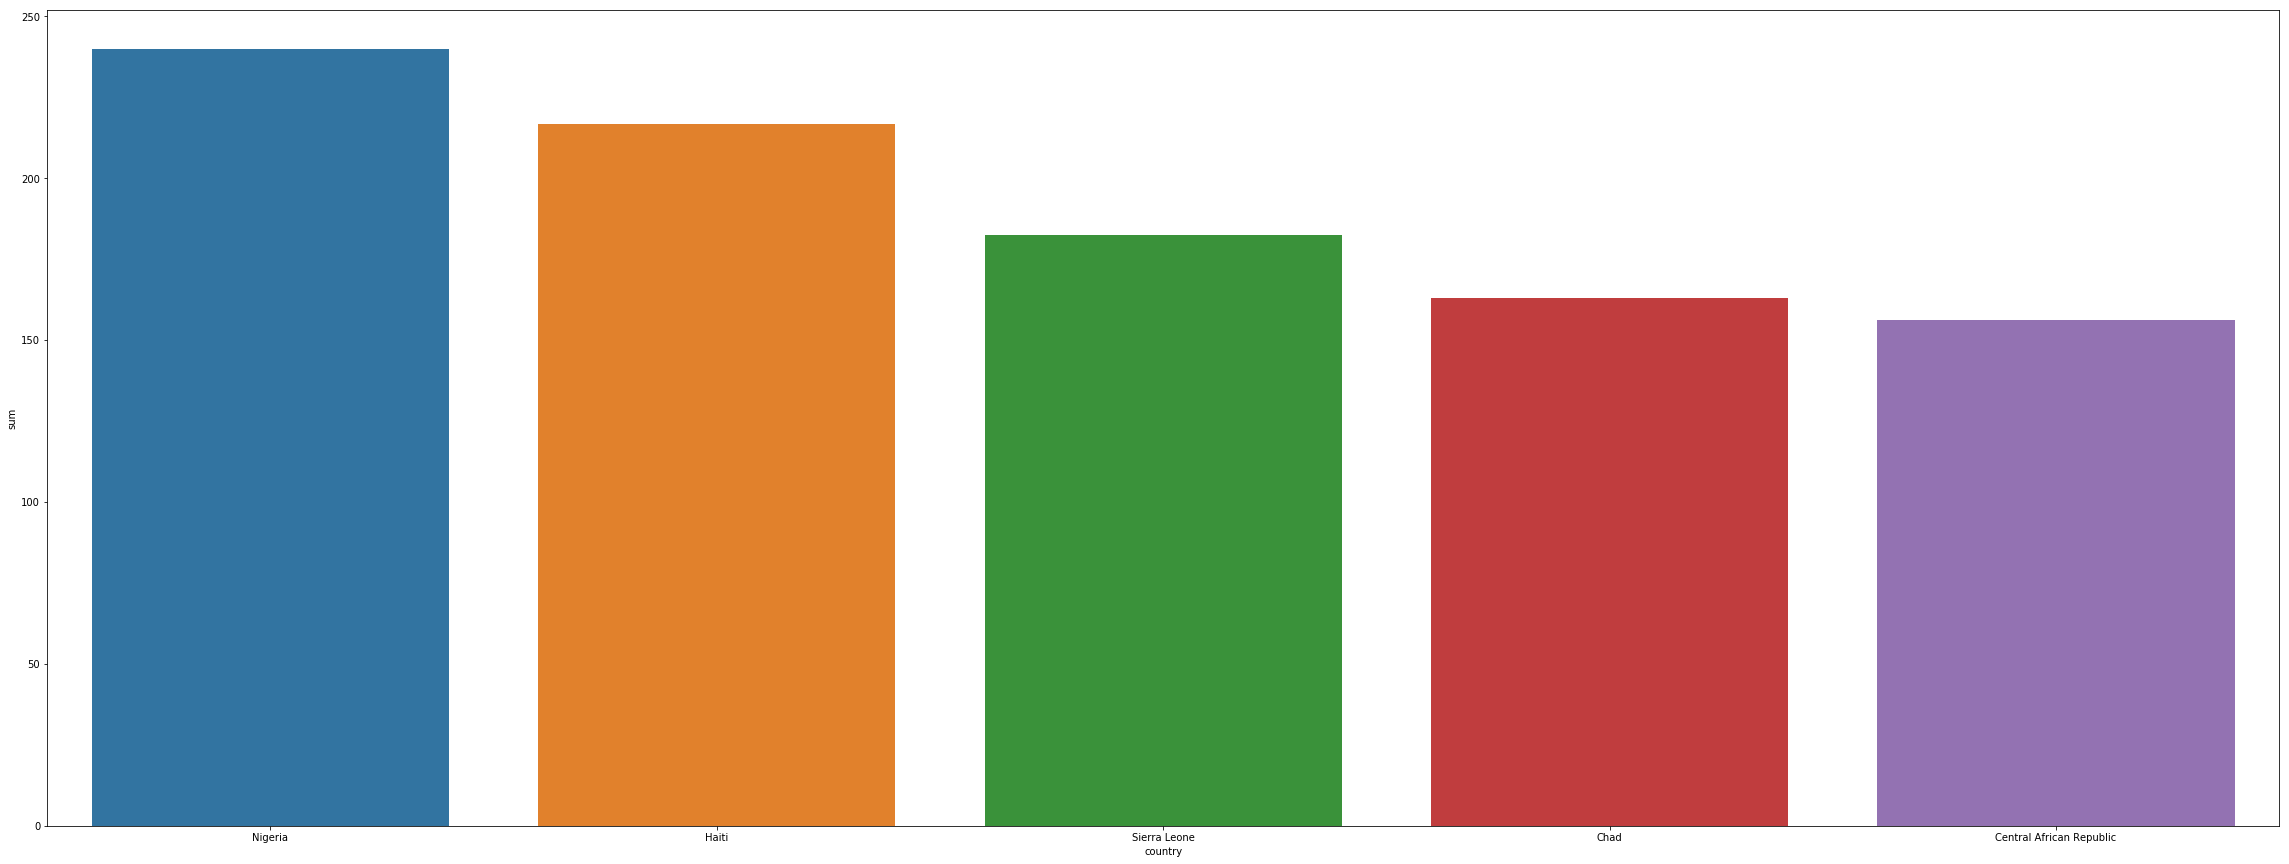

In [53]:
top5_bar = sns.barplot(x="country", y="sum", data=top5_kmeans)
top5_bar

In [54]:
help_pca_cluster[help_pca_cluster['cluster ID'] == 4].country.values

array(['Luxembourg', 'Malta', 'Singapore'], dtype=object)

In [55]:
help_pca_cluster[help_pca_cluster['cluster ID'] == 2].country.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

#### Above is the list of developed countries which doesn't require financial aid

### Fitting Hierarchical clustering on the data set

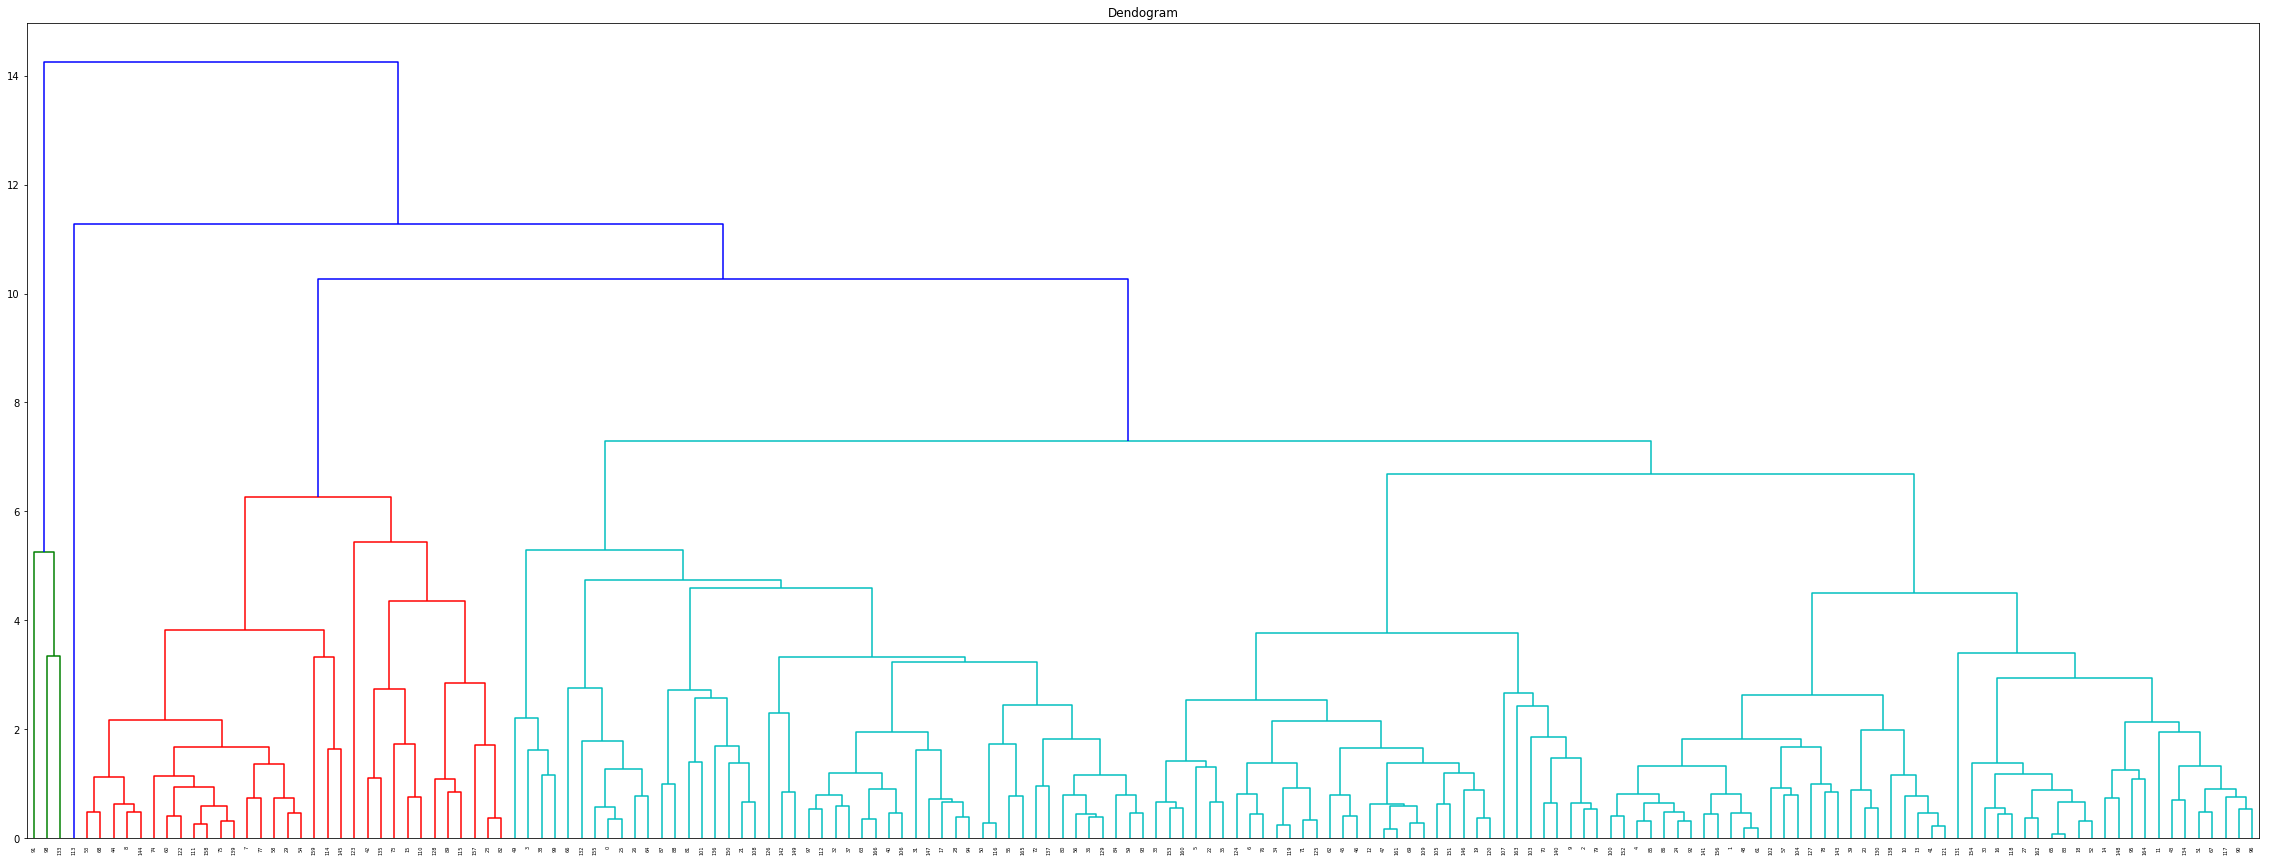

In [56]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


help_hier = linkage(help_pca_h, method = "complete", metric='euclidean')
dendrogram(help_hier)
plt.title('Dendogram')
plt.show()

#### From above dendogram it can be observed that alogorithm has clustered data into 3 clusters by default(3 different colors). But to avoid underfitting but to get the better accuracy we will find out the number of clusters by checking  the largest vertical distance without any horizontal line passing through it . So we draw a new horizontal black line that passes through the blue line. Since it crosses the blue line at four points, therefore the number of clusters will be 4.

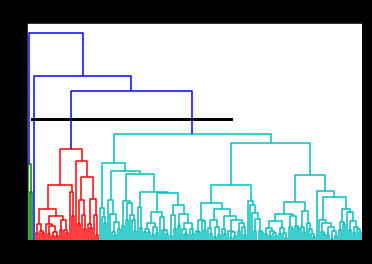

In [57]:
#Removing the cluster ID added as part of kmeans for the dataframe
help_pca_h =  help_pca_h.iloc[:, 0:4]
help_pca_h.head()

,PC1,PC2,PC3,PC4
0,-2.904290,0.095334,-0.715965,1.002240
1,0.428622,-0.586392,-0.332486,-1.157577
2,-0.284370,-0.453810,1.217842,-0.865511
3,-2.923630,1.690471,1.520471,0.837107
4,1.030477,0.136249,-0.225044,-0.844523


In [58]:
#Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage= 'ward')
help_hier1 = hc.fit_predict(help_pca)
help_hier1

array([1, 2, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 1,
       3, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 3, 3, 3, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 3, 1, 1, 2,
       1, 2, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 2, 3, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 3, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3,
       0, 0, 1, 1, 0, 3, 1, 2, 2, 3, 3, 2, 0, 0, 3, 3, 1, 2, 3, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 3, 2, 1, 2, 0, 0, 3, 1, 2, 1, 1, 3, 2, 3,
       2, 1, 2, 0, 0, 0, 3, 3, 2, 3, 2, 1, 1], dtype=int64)

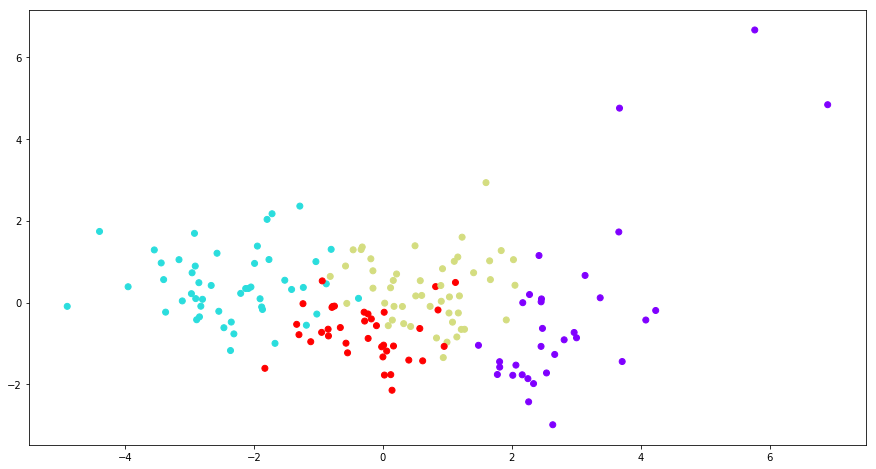

In [63]:
#Scatter plot for clusters formed
plt.scatter(help_pca.iloc[:,0],help_pca.iloc[:,1], c=help_hier1, cmap='rainbow') 
plt.rcParams['figure.figsize']=(10,5)

In [64]:
#Adding cluster ID column generated as part of hierarchical clustering to PCA dataframe
help_hier1=pd.DataFrame(help_hier1, columns=['cluster ID']) 
help_pca_hc = pd.concat([help_pca_h, help_hier1], axis=1)
help_pca_hc = help_pca_hc.iloc[:, 0:5]
help_pca_hc.head()

,PC1,PC2,PC3,PC4,cluster ID
0,-2.904290,0.095334,-0.715965,1.002240,1
1,0.428622,-0.586392,-0.332486,-1.157577,2
2,-0.284370,-0.453810,1.217842,-0.865511,3
3,-2.923630,1.690471,1.520471,0.837107,1
4,1.030477,0.136249,-0.225044,-0.844523,2


In [65]:
#Adding country column to above dataframe
help_hier_final = help_pca_hc
help_hier_final = pd.concat([y, help_hier_final], axis=1, join='outer', join_axes=None, ignore_index=False)
help_hier_final.head()

,country,PC1,PC2,PC3,PC4,cluster ID
0,Afghanistan,-2.904290,0.095334,-0.715965,1.002240,1
1,Albania,0.428622,-0.586392,-0.332486,-1.157577,2
2,Algeria,-0.284370,-0.453810,1.217842,-0.865511,3
3,Angola,-2.923630,1.690471,1.520471,0.837107,1
4,Antigua and Barbuda,1.030477,0.136249,-0.225044,-0.844523,2


In [66]:
#Removing PC's from help_hier_final dataframe and adding original socio-economic data to help_hier_final dataframe
help_hier_final = help_hier_final[['country', 'cluster ID']].merge(help, on = 'country')
help_hier_final.head()

,country,cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
#Calculating mean of each variable grouped by 'cluster ID'
help_hier_child_mort = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).child_mort.mean())
help_hier_exports = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).exports.mean())
help_hier_health = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).health.mean())
help_hier_imports = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).imports.mean())
help_hier_income = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).income.mean())
help_hier_inflation = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).inflation.mean())
help_hier_life_expec = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).life_expec.mean())
help_hier_total_fer = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).total_fer.mean())
help_hier_gdpp = pd.DataFrame(help_hier_final.groupby(["cluster ID"]).gdpp.mean())

In [68]:
#Creating a dataframe from the mean data
help_hier_clust= pd.concat([pd.Series(list(range(0,4))), help_hier_child_mort,help_hier_exports, help_hier_health, 
                        help_hier_imports,help_hier_income, help_hier_inflation, help_hier_life_expec,
                        help_hier_total_fer,help_hier_gdpp], axis=1)
help_hier_clust.columns = ["clusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", 
                           "inflation_mean","life_expec_mean", "total_fer_mean", "gdpp_mean"]
help_hier_clust

,clusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.903125,57.918750,9.015937,50.496875,47475.000000,2.703437,80.484375,1.774063,45331.250000
1,1,90.557143,29.447143,6.592041,43.906122,3885.979592,11.745612,59.365306,4.960816,1928.612245
2,2,16.555102,50.948980,6.756327,59.548980,13746.938776,3.815204,73.591837,2.067551,7954.000000
3,3,26.640541,28.983486,5.287568,30.958538,12971.621622,12.177730,72.767568,2.463514,6220.702703


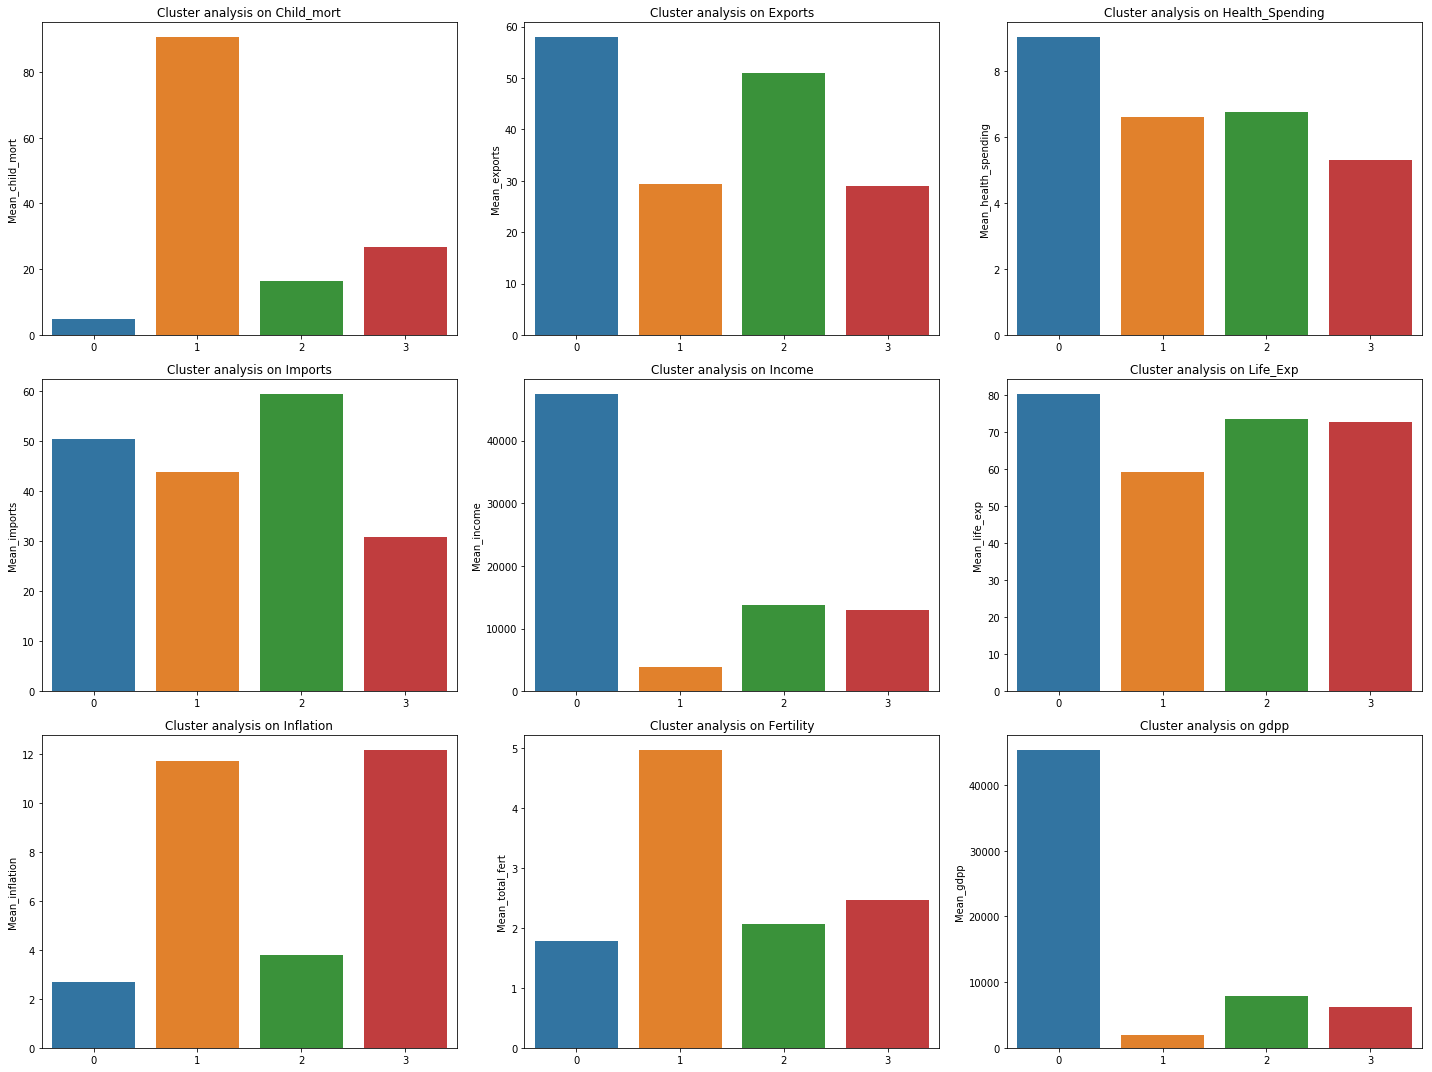

In [69]:
#plotting bar chart 
fig, axs = plt.subplots(3,3,figsize = (20,15))

#Cluster analysis on Child_mort
plt1 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.child_mort_mean, ax = axs[0,0])
plt1.set(title = 'Cluster analysis on Child_mort', xlabel = '', ylabel= 'Mean_child_mort')

#Cluster analysis on Exports
plt2 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.exports_mean, ax = axs[0,1])
plt2.set(title = 'Cluster analysis on Exports', xlabel = '', ylabel= 'Mean_exports')

#Cluster analysis on Health_Spending
plt3 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.health_mean, ax = axs[0,2])
plt3.set(title = 'Cluster analysis on Health_Spending', xlabel = '', ylabel= 'Mean_health_spending')

#Cluster analysis on Imports
plt4 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.imports_mean, ax = axs[1,0])
plt4.set(title = 'Cluster analysis on Imports', xlabel = '', ylabel= 'Mean_imports')

#Cluster analysis on Income
plt5 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.income_mean, ax = axs[1,1])
plt5.set(title = 'Cluster analysis on Income', xlabel = '', ylabel= 'Mean_income')

#Cluster analysis on Life_Exp
plt6 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.life_expec_mean, ax = axs[1,2])
plt6.set(title = 'Cluster analysis on Life_Exp', xlabel = '', ylabel= 'Mean_life_exp')

#Cluster analysis on Inflation
plt7= sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.inflation_mean, ax = axs[2,0])
plt7.set(title = 'Cluster analysis on Inflation', xlabel = '', ylabel= 'Mean_inflation')

#Cluster analysis on Fertility
plt8 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.total_fer_mean, ax = axs[2,1])
plt8.set(title = 'Cluster analysis on Fertility', xlabel = '', ylabel= 'Mean_total_fert')

#Cluster analysis on gdpp
plt9 = sns.barplot(x=help_hier_clust.clusterID, y=help_hier_clust.gdpp_mean, ax = axs[2,2])
plt9.set(title = 'Cluster analysis on gdpp', xlabel = '', ylabel= 'Mean_gdpp')

plt.tight_layout()
plt.show()

In [70]:
#From above plot it is evident that custer 1 is the cluster which needs aid at the most. Let's find list of countries
help_hier_final[help_hier_final['cluster ID'] == 1].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

#### Above is the list of underdeveloped countries which are need of aid at most

#### To find the Top 5 countries within cluster 1 we will consider 'child_mort', 'inflation', & 'total_fer' as factors to select top 5 countries as if the the countries which have high sum of these 3 columns can be considered as top 5.

In [71]:
help_hier_top5 = help_hier_final[help_hier_final['cluster ID'] == 1]
help_hier_top5['sum'] = help_hier_top5['child_mort'] + help_hier_top5['inflation'] + help_hier_top5['total_fer']

help_hier_top5 = help_hier_top5.sort_values(by='sum', ascending=False)
help_hier_top5.head(10)

,country,cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,sum
113,Nigeria,1,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,239.84
66,Haiti,1,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,216.78
132,Sierra Leone,1,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,182.40
32,Chad,1,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,162.98
31,Central African Republic,1,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,156.22
97,Mali,1,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,147.92
3,Angola,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,147.56
37,"Congo, Dem. Rep.",1,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,143.34
49,Equatorial Guinea,1,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17100,141.11
112,Niger,1,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,133.04


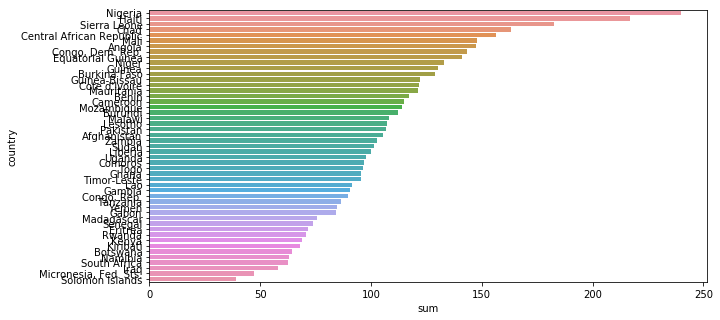

In [72]:
import matplotlib.pyplot as plt
bar = sns.barplot(x="sum", y="country", data=help_hier_top5)
plt.rcParams['figure.figsize']=(30,20)

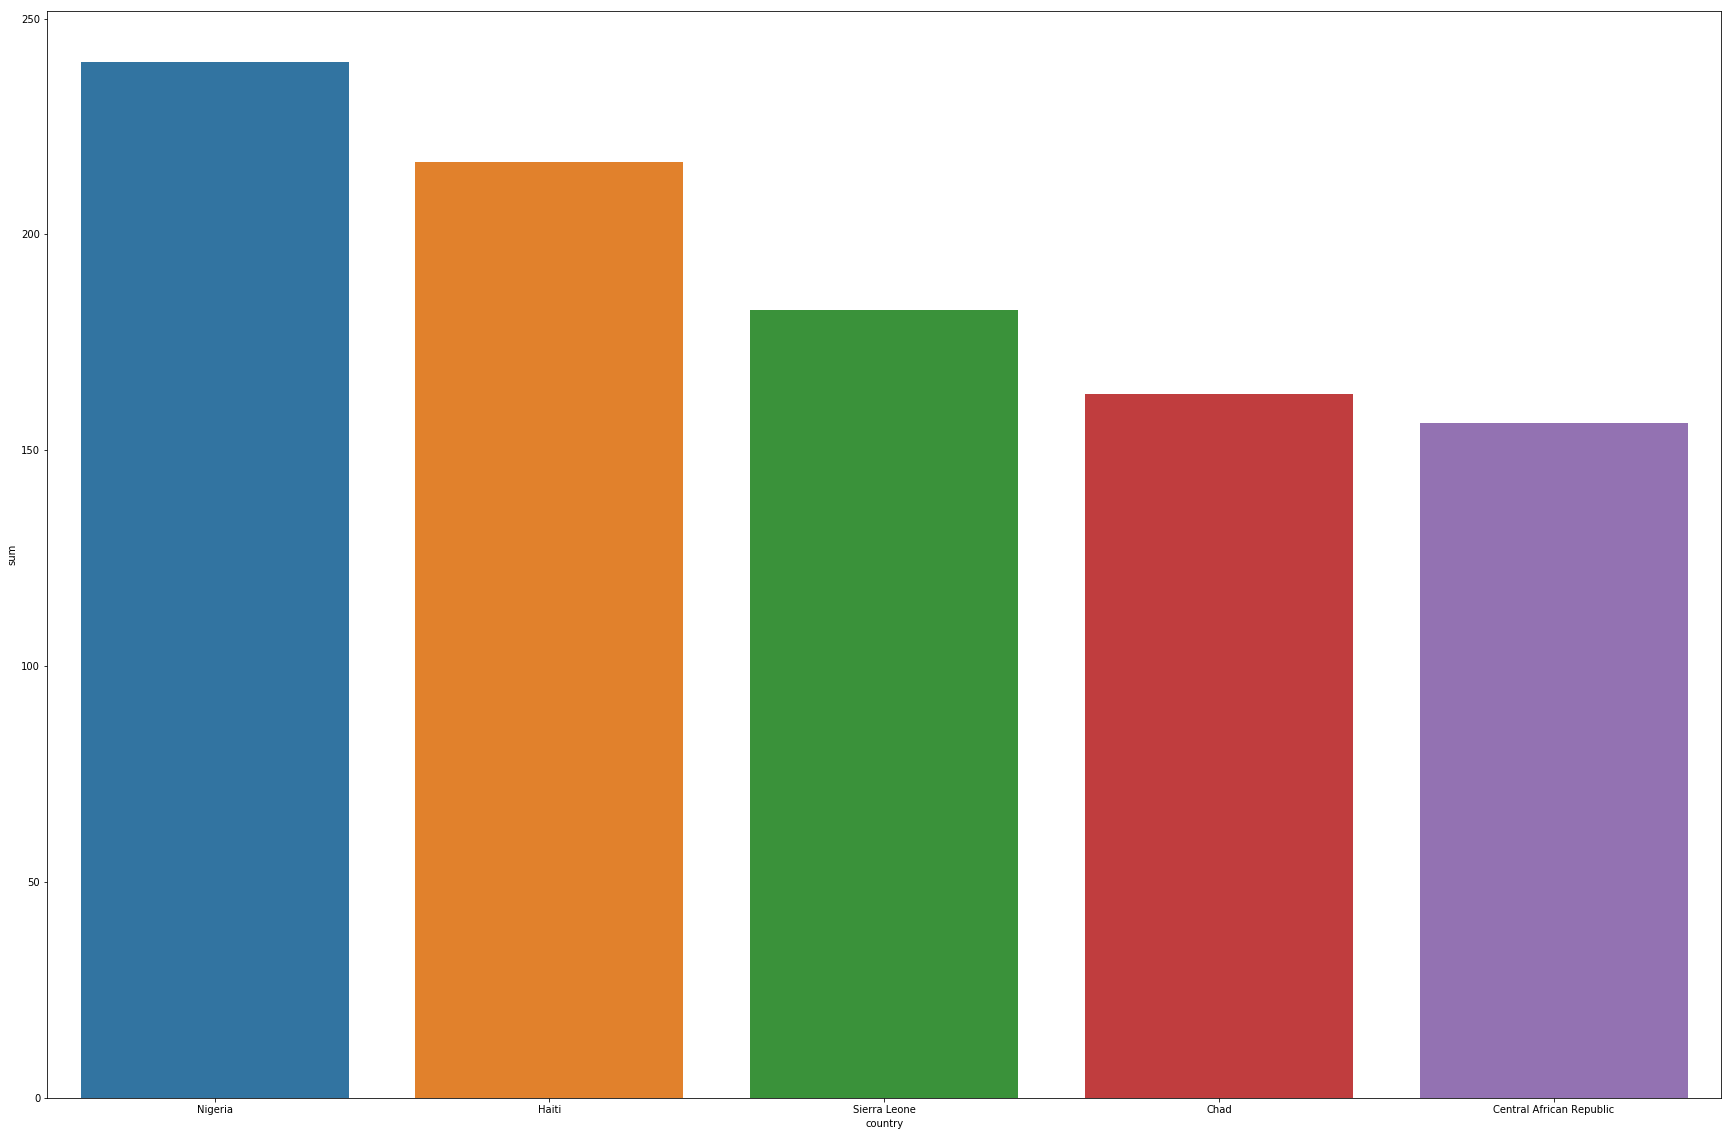

In [73]:
top5_hier = help_hier_top5.iloc[0:5]
top5_hier_bar = sns.barplot(x="country", y="sum", data=top5_hier)
top5_hier_bar

In [74]:
help_hier_final[help_hier_final['cluster ID'] == 0].country.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

#### Above is the list of developed countries which doesn't require financial aid